In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

# pip install scikit-image
# pip install tensorflow
print("success")

success


In [ ]:
dataset="C:/Users/Asode/Documents/DS 4400/Vegetable Images"

train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"test")
validation_folder = os.path.join(dataset,"validation")
print(test_folder)

In [46]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + 
                  str(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])) + 
                  " files in " + str(path.name))
 
count_files(test_folder)

There are 200 files in Bean
There are 200 files in Bitter_Gourd
There are 200 files in Bottle_Gourd
There are 200 files in Brinjal
There are 200 files in Broccoli
There are 200 files in Cabbage
There are 200 files in Capsicum
There are 200 files in Carrot
There are 200 files in Cauliflower
There are 200 files in Cucumber
There are 200 files in Papaya
There are 200 files in Potato
There are 200 files in Pumpkin
There are 200 files in Radish
There are 200 files in Tomato


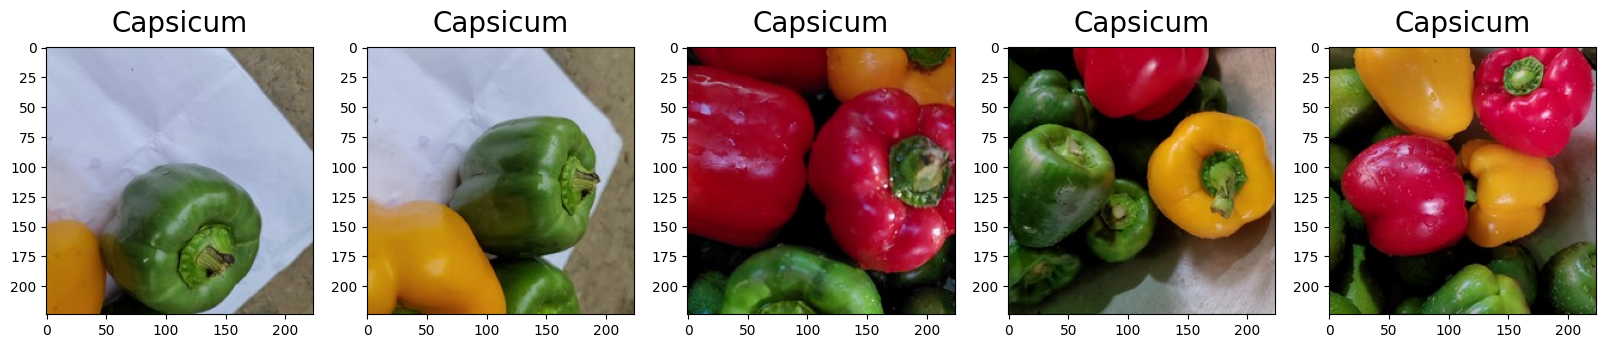

In [47]:
select_vegetable="Capsicum"
rows,columns = 1,5

display_folder=os.path.join(train_folder,select_vegetable)
total_images=rows*columns
fig=plt.figure(1, figsize=(20, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_vegetable,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_vegetable, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

In [2]:
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))
                                     
fig=plt.figure(1, figsize=(15, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-1]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(3, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

NameError: name 'os' is not defined

In [49]:
IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(15, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

87910968/87910968 [==============================] - 10s 0us/step


In [50]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (224, 224),
    batch_size = 64, 
    class_mode = 'categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [51]:
class_map = training_set.class_indices
class_map

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [52]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
235/235 [==============================] - 1605s 7s/step - loss: 0.2894 - accuracy: 0.9106 - val_loss: 0.0510 - val_accuracy: 0.9843
Epoch 2/5
235/235 [==============================] - 1214s 5s/step - loss: 0.0733 - accuracy: 0.9785 - val_loss: 0.0275 - val_accuracy: 0.9947
Epoch 3/5
235/235 [==============================] - 1073s 5s/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.0293 - val_accuracy: 0.9923
Epoch 4/5
235/235 [==============================] - 1086s 5s/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0312 - val_accuracy: 0.9893
Epoch 5/5
235/235 [==============================] - 2948s 13s/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0192 - val_accuracy: 0.9937


In [56]:
model.save('model_inceptionV3_epoch5.h5')

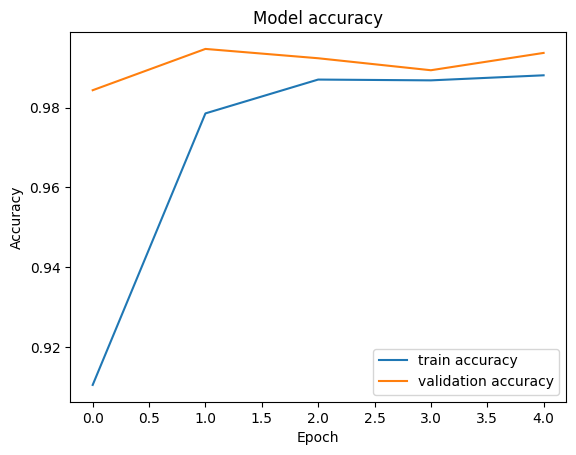

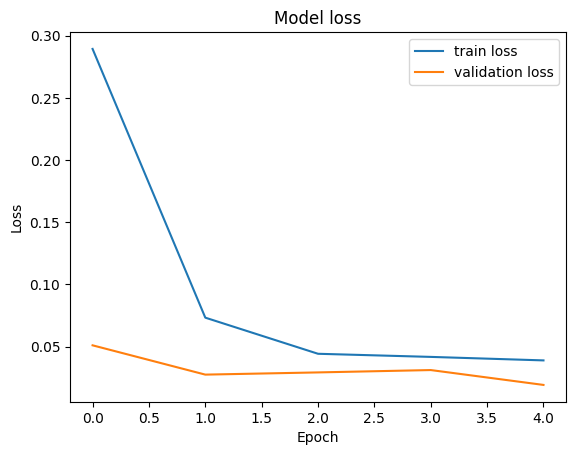

In [57]:
# Creating the linegraphs of the accuracy of the model
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(r)
plot_loss(r)

In [58]:
# load the model
K.clear_session()
path_to_model='./model_inceptionV3_epoch5.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [60]:
# test the model

validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    test_folder,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.
Test Accuracy: 0.994


In [66]:
category={
    0: 'Bean', 
    1: 'Bitter_Gourd', 
    2: 'Bottle_Gourd', 
    3 : 'Brinjal', 
    4: "Broccoli", 
    5: 'Cabbage', 
    6: 'Capsicum', 
    7: 'Carrot', 
    8: 'Cauliflower',
    9: 'Cucumber', 
    10: 'Papaya', 
    11: 'Potato', 
    12: 'Pumpkin', 
    13 : "Radish", 
    14: "Tomato"
}

# predict a single image
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    print(category)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
    
#predict a folder of veggie images
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

1/1 [==============================] - 0s 135ms/step
{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


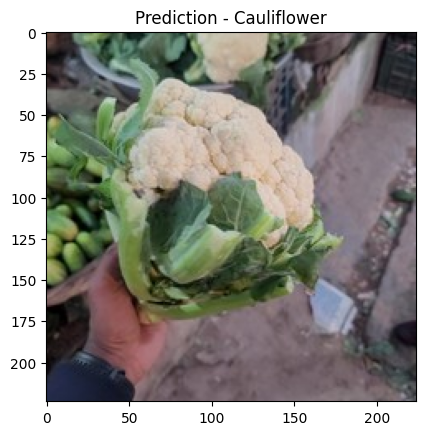

In [67]:
# ppdicting a normal validation image
image_path = 'Cauliflower/1064.jpg'

predict_image(os.path.join(validation_folder, image_path),model)

1/1 [==============================] - 0s 206ms/step
{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


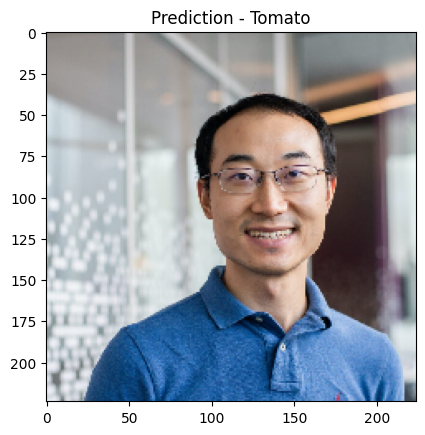

In [69]:
image_path = "hongyang_website.jpg"
vegetables = "C:/Users/Asode/Documents/DS 4400/vegetables"
predict_image(os.path.join(vegetables, image_path),model)

In [68]:
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),model)

1/1 [==============================] - 0s 138ms/step


1/1 [==============================] - 0s 149ms/step
Accuracy for Vegetable Images\test\Bean: 0.00 (0/200)
1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 134ms/step
Accuracy for Vegetable Images\test\Bitter_Gourd: 0.00 (0/200)
1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 122ms/step
Accuracy for Vegetable Images\test\Bottle_Gourd: 0.00 (0/200)
1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 139ms/step


1/1 [==============================] - 0s 129ms/step
Accuracy for Vegetable Images\test\Brinjal: 0.00 (0/200)
1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 160ms/step
Accuracy for Vegetable Images\test\Broccoli: 0.00 (0/200)
1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 163ms/step
Accuracy for Vegetable Images\test\Cabbage: 0.00 (0/200)
1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 131ms/step


1/1 [==============================] - 0s 145ms/step
Accuracy for Vegetable Images\test\Capsicum: 0.00 (0/200)
1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 156ms/step
Accuracy for Vegetable Images\test\Carrot: 0.00 (0/200)
1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 166ms/step
Accuracy for Vegetable Images\test\Cauliflower: 0.00 (0/200)
1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 181ms/step
Accuracy for Vegetable Images\test\Cucumber: 0.00 (0/200)
1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 175ms/step
Accuracy for Vegetable Images\test\Papaya: 0.00 (0/200)
1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 186ms/step
Accuracy for Vegetable Images\test\Potato: 0.00 (0/200)
1/1 [==============================] - 0s 189ms/step


1/1 [==============================] - 0s 181ms/step
Accuracy for Vegetable Images\test\Pumpkin: 0.00 (0/200)
1/1 [==============================] - 0s 190ms/step


1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 195ms/step
Accuracy for Vegetable Images\test\Radish: 0.00 (0/200)
1/1 [==============================] - 0s 210ms/step


1/1 [==============================] - 0s 212ms/step
Accuracy for Vegetable Images\test\Tomato: 0.00 (0/200)


In [86]:
# confusion matrix

def labels_confusion_matrix(validation_folder):
    
    folder_path=validation_folder
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=mapping[i]
        print(true)
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(224,224))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="turbo"
    cm_plot_labels = [i for i in range(15)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [ ]:
print(validation_folder)
y_true,y_pred=labels_confusion_matrix(validation_folder)
print_confusion_matrix(y_true,y_pred)